In [11]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#graphing functions
def plot_2D(graphInfo, title="Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["hPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()

def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict

def run_generation_iX(simData):
    #load variables
    d=simData['d']
    qW=simData['qW']
    qD=simData['qD']
    qH=simData['qH']
    sW=simData['sW']
    sD=simData['sD']
    eW=simData['eW']
    eD=simData['eD']
    eDP=simData['eDP']
    if simData['curGen']<=simData['induceStart']:
        a=0
    else:
        a=simData['a']
    #calculate next gen frequencies
    w2=(qW*(1-sW))**2
    wd=qW*(1-sW)*(qD*(1-sD))
    wh=qW*(1-sW)*(qH*(1-sD*d))
    d2=(qD*(1-sD))**2
    dh=qD*(1-sD)*(qH*(1-sD*d))
    h2=(qH*(1-sD*d))**2
    
    zW=(1-a)*(1-eW)*eD + a*(1-eW)*eDP
    zD=(1-a)*eW*(1-eD) + a*eW*(1-eDP)
    zH=(1-a)*(1-eW)*(1-eD) + a*(1-eW)*(1-eDP)
    zS=(1-a)*eD + a*eDP
    zX=(1-a)*eW*eD + a*eW*eDP
    
    qWP = zW*(2*wd + wh + dh + .5*h2) + w2 + wh + .25*h2
    qDP = zD*(2*wd + wh + dh + .5*h2) + (1-zS)*(d2 + dh + .25*h2)
    qHP = zH*(2*wd + wh + dh + .5*h2)
    #qXP represents amount lost from inviable recombinations
    qXP = zX*(2*wd + wh + dh + .5*h2) + zS*(d2 + dh + .25*h2)
    #catch rounding errors from float multiplication
    total=qWP+qDP+qHP
    if total!=1:
        qWP/=total
        qDP/=total
        qHP/=total
    return {'qW':qWP,'qD':qDP,'qH':qHP}
    
def run_simulation_iX(simData,graph=False,table=False):
    graphInfo={"xPlots": [0], "wPlots": [simData['qW']], "dPlots": [simData['qD']], "hPlots": [simData['qH']]}
    for i in range(1,simData['generations']+1):
        simData['curGen']=i
        update_vars(simData,run_generation_iX(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['hPlots'].append(simData['qH'])
        if simData['qW']>.99999:
            if graph:
                plot_2D(graphInfo)
            if table:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plot_2D(graphInfo)
            if table:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plot_2D(graphInfo)
    if table:
        print(pd.DataFrame(graphInfo))
    return 0

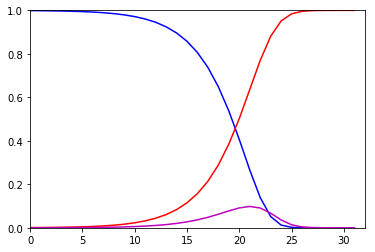

      dPlots    hPlots        wPlots  xPlots
0   0.001000  0.000000  9.990000e-01       0
1   0.001216  0.000304  9.984802e-01       1
2   0.001686  0.000421  9.978924e-01       2
3   0.002339  0.000584  9.970773e-01       3
4   0.003243  0.000810  9.959475e-01       4
5   0.004496  0.001122  9.943815e-01       5
6   0.006234  0.001554  9.922116e-01       6
7   0.008641  0.002153  9.892061e-01       7
8   0.011976  0.002979  9.850454e-01       8
9   0.016591  0.004119  9.792898e-01       9
10  0.022975  0.005689  9.713366e-01      10
11  0.031794  0.007843  9.603629e-01      11
12  0.043959  0.010787  9.452535e-01      12
13  0.060701  0.014786  9.245125e-01      13
14  0.083666  0.020169  8.961648e-01      14
15  0.115013  0.027320  8.576672e-01      15
16  0.157492  0.036628  8.058797e-01      16
17  0.214420  0.048368  7.372129e-01      17
18  0.289397  0.062414  6.481890e-01      18
19  0.385438  0.077714  5.368477e-01      19
20  0.502988  0.091436  4.055766e-01      20
21  0.6364

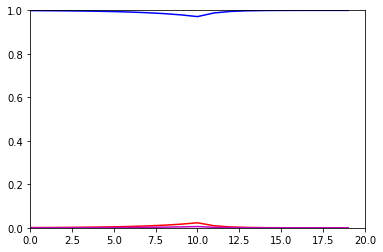

      dPlots    hPlots    wPlots  xPlots
0   0.001000  0.000000  0.999000       0
1   0.001216  0.000304  0.998480       1
2   0.001686  0.000421  0.997892       2
3   0.002339  0.000584  0.997077       3
4   0.003243  0.000810  0.995947       4
5   0.004496  0.001122  0.994381       5
6   0.006234  0.001554  0.992212       6
7   0.008641  0.002153  0.989206       7
8   0.011976  0.002979  0.985045       8
9   0.016591  0.004119  0.979290       9
10  0.022975  0.005689  0.971337      10
11  0.009416  0.002323  0.988261      11
12  0.003808  0.000947  0.995245      12
13  0.001533  0.000383  0.998084      13
14  0.000616  0.000154  0.999230      14
15  0.000248  0.000062  0.999691      15
16  0.000099  0.000025  0.999876      16
17  0.000040  0.000010  0.999950      17
18  0.000016  0.000004  0.999980      18
19  0.000006  0.000002  0.999992      19


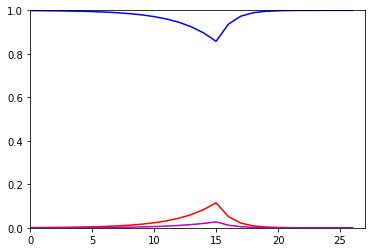

      dPlots    hPlots    wPlots  xPlots
0   0.001000  0.000000  0.999000       0
1   0.001216  0.000304  0.998480       1
2   0.001686  0.000421  0.997892       2
3   0.002339  0.000584  0.997077       3
4   0.003243  0.000810  0.995947       4
5   0.004496  0.001122  0.994381       5
6   0.006234  0.001554  0.992212       6
7   0.008641  0.002153  0.989206       7
8   0.011976  0.002979  0.985045       8
9   0.016591  0.004119  0.979290       9
10  0.022975  0.005689  0.971337      10
11  0.031794  0.007843  0.960363      11
12  0.043959  0.010787  0.945253      12
13  0.060701  0.014786  0.924512      13
14  0.083666  0.020169  0.896165      14
15  0.115013  0.027320  0.857667      15
16  0.051334  0.011939  0.936727      16
17  0.021455  0.005203  0.973342      17
18  0.008758  0.002163  0.989079      18
19  0.003540  0.000881  0.995579      19
20  0.001425  0.000356  0.998219      20
21  0.000573  0.000143  0.999284      21
22  0.000230  0.000058  0.999712      22
23  0.000092  0.

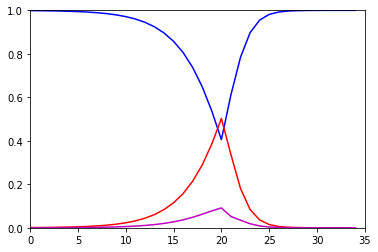

      dPlots    hPlots    wPlots  xPlots
0   0.001000  0.000000  0.999000       0
1   0.001216  0.000304  0.998480       1
2   0.001686  0.000421  0.997892       2
3   0.002339  0.000584  0.997077       3
4   0.003243  0.000810  0.995947       4
5   0.004496  0.001122  0.994381       5
6   0.006234  0.001554  0.992212       6
7   0.008641  0.002153  0.989206       7
8   0.011976  0.002979  0.985045       8
9   0.016591  0.004119  0.979290       9
10  0.022975  0.005689  0.971337      10
11  0.031794  0.007843  0.960363      11
12  0.043959  0.010787  0.945253      12
13  0.060701  0.014786  0.924512      13
14  0.083666  0.020169  0.896165      14
15  0.115013  0.027320  0.857667      15
16  0.157492  0.036628  0.805880      16
17  0.214420  0.048368  0.737213      17
18  0.289397  0.062414  0.648189      18
19  0.385438  0.077714  0.536848      19
20  0.502988  0.091436  0.405577      20
21  0.336304  0.051881  0.611815      21
22  0.180507  0.035044  0.784449      22
23  0.084035  0.

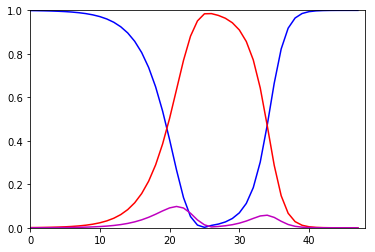

      dPlots    hPlots    wPlots  xPlots
0   0.001000  0.000000  0.999000       0
1   0.001216  0.000304  0.998480       1
2   0.001686  0.000421  0.997892       2
3   0.002339  0.000584  0.997077       3
4   0.003243  0.000810  0.995947       4
5   0.004496  0.001122  0.994381       5
6   0.006234  0.001554  0.992212       6
7   0.008641  0.002153  0.989206       7
8   0.011976  0.002979  0.985045       8
9   0.016591  0.004119  0.979290       9
10  0.022975  0.005689  0.971337      10
11  0.031794  0.007843  0.960363      11
12  0.043959  0.010787  0.945253      12
13  0.060701  0.014786  0.924512      13
14  0.083666  0.020169  0.896165      14
15  0.115013  0.027320  0.857667      15
16  0.157492  0.036628  0.805880      16
17  0.214420  0.048368  0.737213      17
18  0.289397  0.062414  0.648189      18
19  0.385438  0.077714  0.536848      19
20  0.502988  0.091436  0.405577      20
21  0.636425  0.098181  0.265394      21
22  0.770319  0.090964  0.138717      22
23  0.881212  0.

-2.6183304986958853

In [12]:
simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.2,'d':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':10000}
run_simulation_iX(simData, True, True)

simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.2,'d':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':10}
run_simulation_iX(simData,True,True)

simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.2,'d':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':15}
run_simulation_iX(simData,True,True)

simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.2,'d':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':20}
run_simulation_iX(simData,True,True)

simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.2,'d':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':25}
run_simulation_iX(simData,True,True)

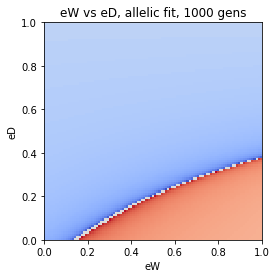

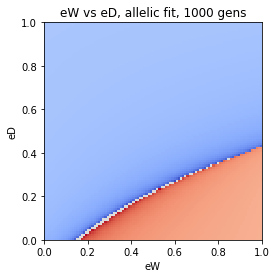

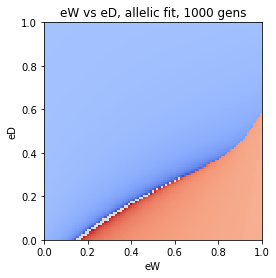

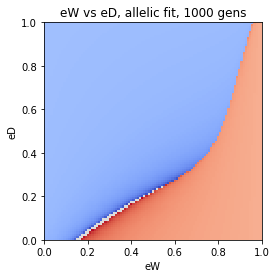

In [13]:
xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.2,'d':.5,'eW':xVals[xIndex],'eD':yVals[yIndex],'eDP':0,'a':0,'generations':1000, 'induceStart':10000}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'eW','eD','eW vs eD, allelic fit, 1000 gens')


xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.2,'d':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':10}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'eW','eD','eW vs eD, allelic fit, 1000 gens')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.2,'d':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':15}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'eW','eD','eW vs eD, allelic fit, 1000 gens')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.2,'d':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':20}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'eW','eD','eW vs eD, allelic fit, 1000 gens')
